In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *
#from src.callbacks import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
#folder deberia ser definida aqui arriba
folder = 'prueba/'

In [4]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [5]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [6]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


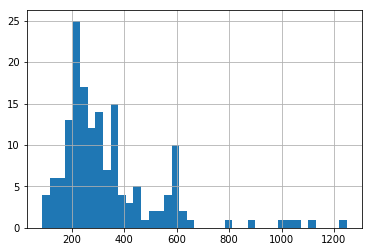

In [7]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [8]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [9]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [10]:
dicti = creating_dict()

In [11]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [12]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

0      M000K000T000P000P000V000L000K000R000R000R000E0...
1      M000D000L000E000Y000Q000K0000K000L0000A000A000...
2      M00S00K00L00L00T00E00S00D00S00L00K00V00I00R00R...
3      M00A00F00D00R00Q00K00L00V00E00A00V00K00E00A00K...
4      M00V00S00V00D00Q00V00K00K00A00R00E00G00K00K00R...
5      M00000V00000Q00000K00000P00000H00000S00000F000...
6      M00000V00000K00000R00000T00000H00000G00000Y000...
7      M000000D000000P000000Y000000K000000V000000I000...
8      M000000P000000N000000P000000H000000Y000000R000...
9      M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
10     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
11     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
12     M0K0A0N0V0Y0S0M0E0G0E0V0K0E0E0I0E0L0P0A0I0F0N0...
13     M0K0V0K0V0F0N0L0E0G0E0P0V0E0E0I0E0L0P0K0V0F0S0...
14     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
15     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
16     M00Q00A00V00E00M00E00K00K00A00G00N00E00N00P00M...
17     M00P00A00I00D00L00S00T00

In [13]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [14]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [15]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fb4aa3529e8>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fb4aa352a20>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fb4aa352a58>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fb4aa352a90>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fb4aa352ac8>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fb4aa352b00>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fb4aa352b38>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fb4aa352b70>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fb4aa352ba8>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fb4aa3524a8>,0.0


In [16]:
df_digit1 = first_digit_EC(df_bin)

In [17]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fb4aa3529e8>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fb4aa352a20>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fb4aa352a58>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fb4aa352a90>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fb4aa352ac8>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fb4aa352b00>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fb4aa352b38>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fb4aa352b70>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fb4aa352ba8>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fb4aa3524a8>,0.0,[nan]


In [18]:
labels_task1 = bin_to_onehot(df_digit1, 2)

In [19]:
labels_task1

[array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0.

There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


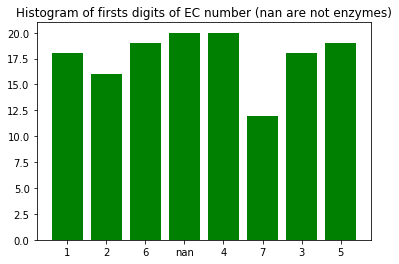

In [20]:
counting_multilabel(df_digit1)

In [21]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [22]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [23]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, labels_task1, ec_multilabel)

In [24]:
splitting_sets = splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [25]:
len(dicti_padding['post_padding'])

142

In [26]:
ec_multilabel.shape

(142, 7)

In [27]:
creating_augmented_data(dicti_padding, labels_task1, splitting_sets, 'prueba/', 'aug_data.h5', 
                            labels_task2 = ec_multilabel, kfold_bool = True)

In [28]:
# keeping indices total data
keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_data_enz.h5', True)

In [29]:
#keeping indices aug data
file_data = os.path.join(absPath, 'data/prueba/', 'aug_data.h5')
h5f = h5py.File(file_data, 'r')
task1_aug = h5f['labels_task1'][:len(h5f['labels_task1'])]


# Loading splitting indices
file_idcs = os.path.join(absPath, 'data/prueba/', 'idcs_aug_split.pickle')

with open(file_idcs, "rb") as input_file:
    k_aug_indices = pickle.load(input_file)

keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_aug_enz.h5', True)


In [30]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

batch_size = 6
epochss = 20

In [31]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
#model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

W0711 13:54:11.854703 140415822038784 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 13:54:11.867588 140415822038784 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 13:54:11.869756 140415822038784 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 13:54:11.877635 140415822038784 deprecation.py:506] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 592, 26)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 592, 26)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15392)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 314)               4833402   
_________________________________________________________________
dropout_2 (Dropout)          (None, 314)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 77)                24255     
_________________________________________________________________
dropout_3 (Dropout)          (None, 77)                0         
__________

In [32]:
model_number_layers(model)

0 input_1
1 dropout_1
2 flatten_1
3 dense_1
4 dropout_2
5 dense_2
6 dropout_3
7 dense_3
8 dropout_4
9 dense_4


In [33]:
#saving_initial_weights(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [34]:
#saving_initial_biases(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [35]:
generators = trainval_generators(splitting_sets, 'post_padding', 'prueba/', batch_size, 'labels_task1', True)

In [36]:
model_type= "post_padding"

In [37]:
#adamm = Adam()
#model.compile(loss='categorical_crossentropy', optimizer = adamm, metrics=['accuracy'])

In [38]:
#Esto deberia ser una funcion "train_model" o algo asi
model_type = "post_padding"
for idx,i in enumerate(generators):
    i_train, i_val, i_test = splitting_sets[idx]
    len_train, len_val, len_test = len(i_train), len(i_val), len(i_test)
    train_generator, val_generator = i
    folder_cp = ''.join(string for string in [folder, model_type, '/', str(idx)]) 
    #print(folder_cp)
    if not os.path.exists(os.path.join(absPath, 'data/checkpoint/', folder_cp)):
        os.makedirs(''.join(string for string in [absPath, 'data/checkpoint/', folder_cp]))
    #if idx==0:
    #    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
    #                               [3,5,7,9], False, False, True, False)
    #else:
    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
                                   [3,5,7,9], False, False, False, False)
    model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
    start = time.time()
    history = model.fit_generator(generator=train_generator, 
                              validation_data=val_generator,
                             steps_per_epoch= int(len_train/batch_size),
                              validation_steps=int(len_val/batch_size),
                             epochs=epochss,
                             callbacks=callbacks_list,
                             verbose=1)
    end = time. time()
    count_time(start, end, folder, model_type)
    saving_results(history,'post_padding', folder, idx, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 592, 26)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 592, 26)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15392)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 314)               4833402   
_________________________________________________________________
dropout_6 (Dropout)          (None, 314)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 77)                24255     
_________________________________________________________________
dropout_7 (Dropout)          (None, 77)                0         
__________

W0711 13:54:12.568532 140415822038784 deprecation.py:323] From /home/angela/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
18/18 [==============================] - 1s 57ms/step - loss: 0.7951 - acc: 0.5463 - val_loss: 3.2816 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-001-0.0000.hdf5
Epoch 2/20
18/18 [==============================] - 1s 36ms/step - loss: 0.8962 - acc: 0.8148 - val_loss: 0.9024 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/20
18/18 [==============================] - 1s 36ms/step - loss: 0.8131 - acc: 0.7315 - val_loss: 0.7294 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/20
18/18 [==============================] - 1s 37ms/step - loss: 0.6305 - acc: 0.7500 - val_loss: 0.7375 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5607 - acc: 0.8056 - val_loss: 0.9331 - val_acc: 0.0000e+00

Epo

Epoch 12/20
18/18 [==============================] - 1s 37ms/step - loss: 0.3106 - acc: 0.8426 - val_loss: 1.0060 - val_acc: 0.2500

Epoch 00012: val_acc did not improve from 0.25000
Epoch 13/20
18/18 [==============================] - 1s 36ms/step - loss: 0.4756 - acc: 0.8611 - val_loss: 0.6677 - val_acc: 0.4167

Epoch 00013: val_acc improved from 0.25000 to 0.41667, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-013-0.4167.hdf5
Epoch 14/20
18/18 [==============================] - 1s 37ms/step - loss: 0.3530 - acc: 0.8241 - val_loss: 0.7047 - val_acc: 0.3333

Epoch 00014: val_acc did not improve from 0.41667
Epoch 15/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5068 - acc: 0.7315 - val_loss: 0.6451 - val_acc: 0.4167

Epoch 00015: val_acc improved from 0.41667 to 0.41667, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-015-0.4167.hdf5
Epoch 16/20
18/18 [=========

Fold:  0
[32, 53, 60, 94, 137, 88, 103, 119, 82, 124, 23, 50, 56, 17, 9]


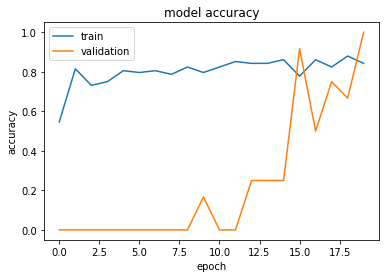

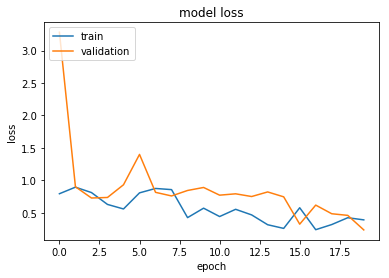

best epoch:  020
Counter({1: 13, 0: 2})

Model Report
Accuracy (test set): 1
Confusion matrix:
[[ 2  0]
 [ 0 13]]
Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        13

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Model Report II part
AUC Score (Test): 1.000000


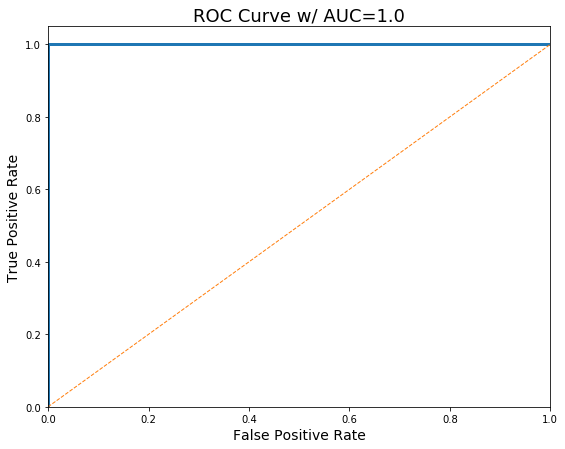

Partial AUC: 0.05 0.05
Fold:  1
[27, 40, 68, 101, 141, 79, 105, 124, 91, 120, 23, 44, 62, 0, 18]


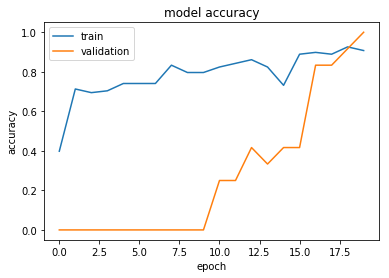

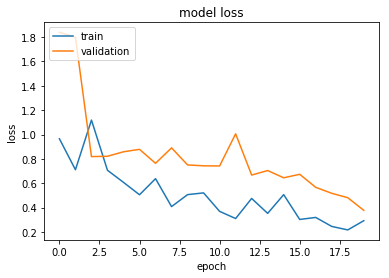

best epoch:  020
Counter({1: 13, 0: 2})

Model Report
Accuracy (test set): 1
Confusion matrix:
[[ 2  0]
 [ 0 13]]
Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        13

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Model Report II part
AUC Score (Test): 1.000000


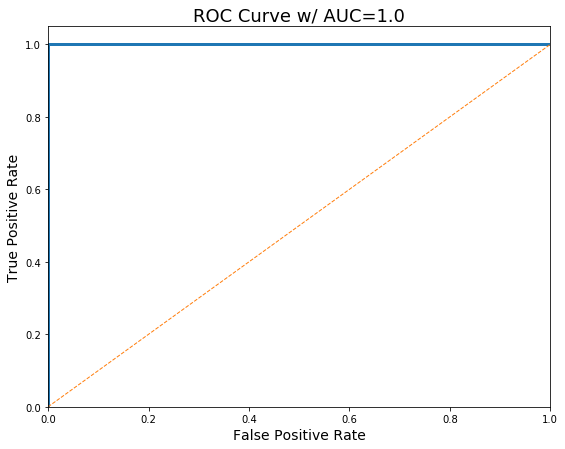

Partial AUC: 0.05 0.05
Fold:  2
[29, 47, 63, 92, 130, 72, 110, 127, 82, 115, 21, 53, 60, 3, 7]


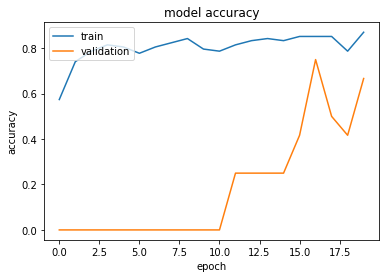

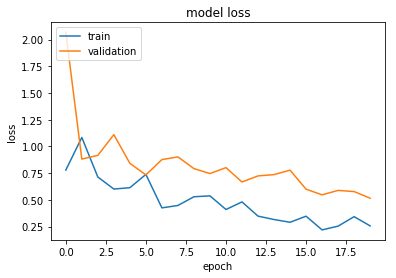

best epoch:  017
Counter({1: 13, 0: 2})

Model Report
Accuracy (test set): 1
Confusion matrix:
[[ 2  0]
 [ 0 13]]
Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        13

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Model Report II part
AUC Score (Test): 1.000000


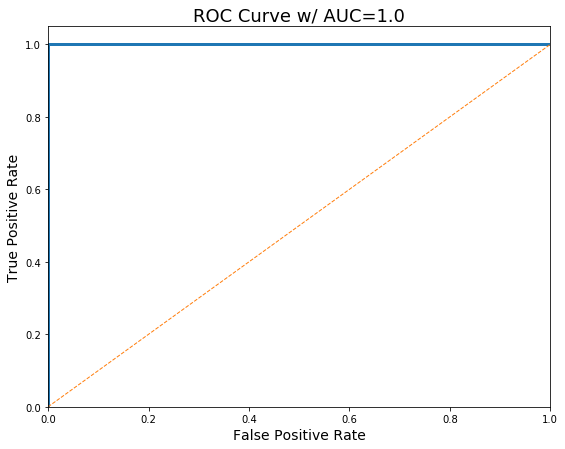

Partial AUC: 0.05 0.05


In [39]:
#post-processing

#this should be a function
for idx,i in enumerate(splitting_sets):
    print('Fold: ', idx)
    i_train, i_val, i_test = i
    print(i_test)
    #loading best model
    his_folder = ''.join(string for string in [absPath, 'data/results/', folder, model_type, '/', str(idx)])
    history = plot_history(his_folder)
    path_to_cp = ''.join(string for string in [absPath, 'data/checkpoint/', folder, model_type, 
                                            '/', str(idx)])
    model, best_path = load_best_model(history, path_to_cp)
    cps_loc = ''.join(string for string in [absPath, 'data/checkpoint/', folder, model_type, 
                                            '/', str(idx), '/*.hdf5'])
    #removing the rest of weights
    fileList = glob.glob(cps_loc, recursive=True)
    fileList.remove(best_path)
    if len(fileList) >1:
        for filePath in fileList:
            try:
                os.remove(filePath)
            except OSError:
                print("Error while deleting file")
    #loading test data    
    file_data = os.path.join(absPath, 'data/data_ec_multilabel.h5')
    
    if model_type == "aug_padding":
        file_data = os.path.join(absPath, 'data/', folder, 'aug_data.h5')
    else:
        file_data = os.path.join(absPath, 'data/', folder, 'data.h5')
    h5f = h5py.File(file_data, 'r')
    
    instarget = Target('AAAAAA')
    x_test = h5f[model_type][sorted(i_test)]
    x_test = instarget.int_to_onehot(list(x_test), len(dicti))
    y_test = h5f["labels_task1"][sorted(i_test)]
    
    #predicting 
    y_predprob = model.predict(x_test)
    y_pred = y_predprob.argmax(axis=-1)
    y_test_scalar = y_test.argmax(axis=-1)
    y_prob = y_predprob[:,1]
    
    print(Counter(y_pred))
    
    #confusion matrix
    #file_conf = ''.join(string for string in [his_folder, '/resulting_metrics.pickle'])    
    confusion_matrix(y_test_scalar, y_pred, his_folder)
    
    #AUC
    #file_auc = ''.join(string for string in [his_folder, '/AUC.pickle'])
    compute_roc(y_test_scalar, y_prob, his_folder )
    
    computing_partial_auc(y_test_scalar, y_prob, his_folder)

In [40]:
list_paddings = ["post_padding"]
df_his, k = collecting_metrics_folds("history", list_paddings, folder, 3)

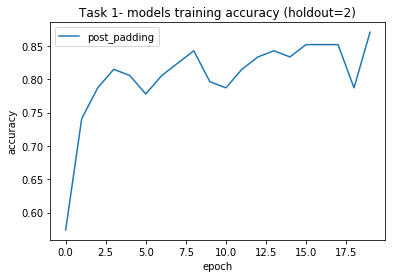

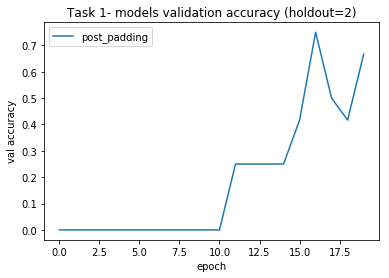

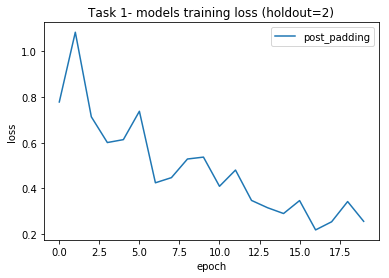

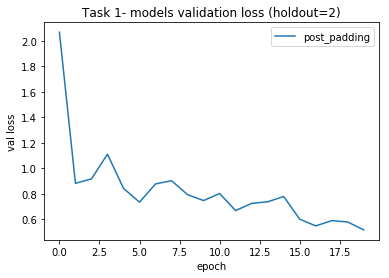

In [41]:
plotting_history(df_his, "Task 1", folder, k)

In [42]:
df_auc,k = collecting_metrics_folds("auc", list_paddings, folder, 3)
df_auc= df_auc.reset_index(0)
df_auc['pre_padding'] = df_auc['post_padding']
df_auc = df_auc.melt(id_vars='index')
df_auc

,index,variable,value
0,0,post_padding,1.0
1,1,post_padding,1.0
2,2,post_padding,1.0
3,0,pre_padding,1.0
4,1,pre_padding,1.0
5,2,pre_padding,1.0


In [43]:
def plotting_auc_boxplots(df, folder, nfolds):
    p = (ggplot(df, aes(x='variable', y="value", fill="variable"))
         +geom_boxplot()
         + scale_fill_brewer(palette="Set3", type='qual')
         +theme_bw()
         +theme(figure_size=(12,16), aspect_ratio=1, legend_title=element_blank(), axis_text_y =element_text(size=10),
                legend_text=element_text(size=10), strip_text_x = element_text(size=10))
         + ggtitle("Task 1 - AUC (%i holdouts)" %nfolds)
    )
    file_auc = ''.join(string for string in [absPath,'data/results/', folder])
    p.save(path = file_auc, format = 'pdf', dpi=300, filename="aucs_comparison.pdf")
    return p

/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 16 in image.
  from_inches(height, units), units))
/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: /home/angela/padding_EBI/data/results/prueba/aucs_comparison.pdf
  warn('Filename: {}'.format(filename))


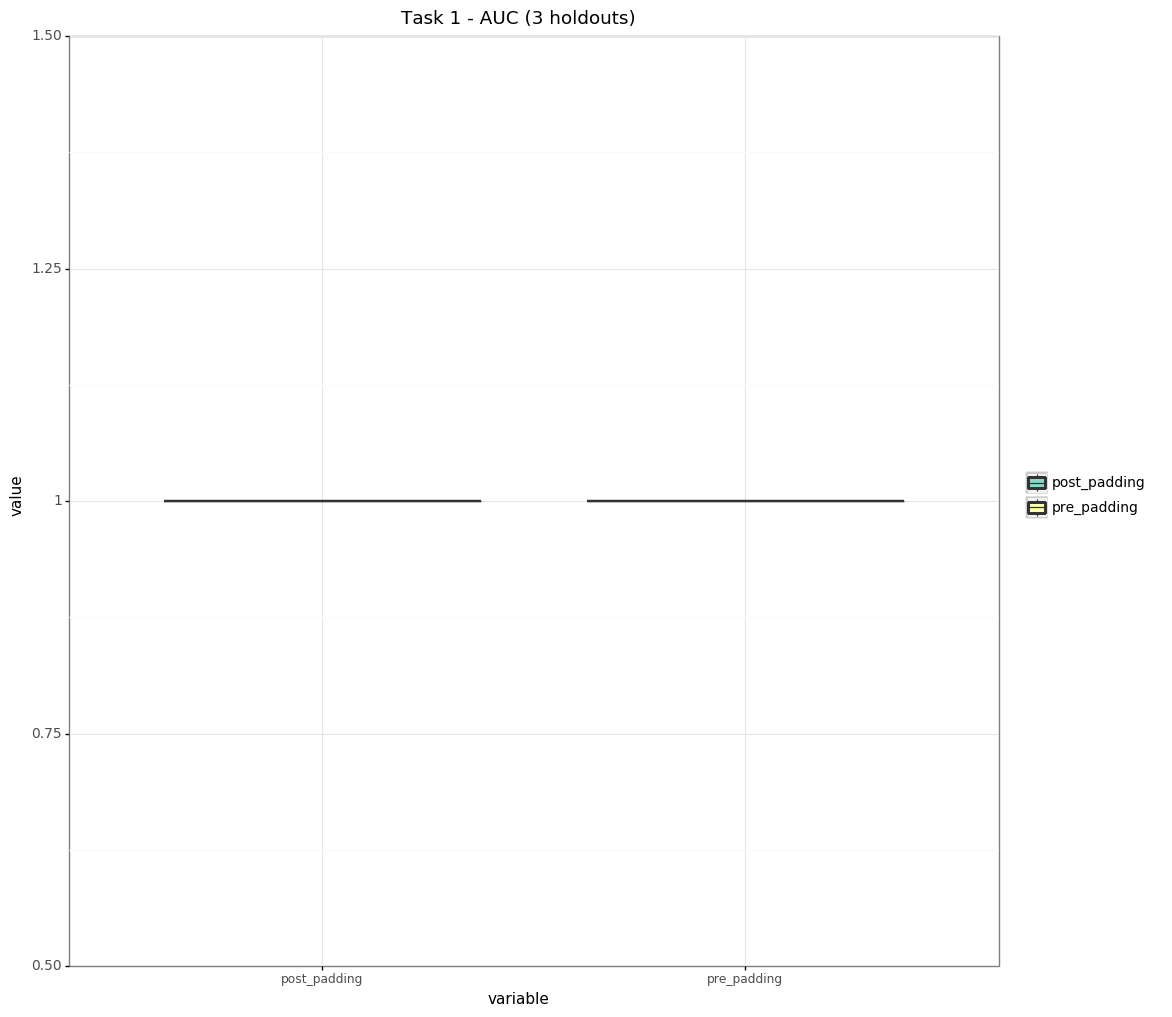

<ggplot: (8775742458674)>

In [44]:
plotting_auc_boxplots(df_auc, folder, 3)

In [46]:
df_roc,k = collecting_metrics_folds("roc", list_paddings, folder, 3)
df_roco = processing_roc_auc(df_roc, "roc")
df_roco2 = df_roco.copy()
df_roco2['variable']="pre_padding"
df2 = pd.concat([df_roco, df_roco2])

In [50]:
plotting_ROC_curves(df2, folder, 3)

TypeError: plotting_ROC_curves() takes 2 positional arguments but 3 were given

In [96]:
def processing_metrics_results(df, list_paddings, folder, nfolds):
    metrics, k = collecting_metrics_folds("resulting_metrics", list_paddings, folder, 3)
    accu = metrics.apply(lambda x: [y[0] for y in x])
    scores = metrics.apply(lambda x: [y[2] for y in x])
    
    #processing scores
    list_dfs = []
    for i,row in scores.iterrows():
        for pad in list_paddings:
            formatted = pd.DataFrame(scores.loc[0, pad]).transpose().reset_index()
            formatted.columns = ['class', 'f1-score', 'precision', 'recall', 'support']
            formatted['index'] = row.name
            formatted['type_padding'] = pad
            list_dfs.append(formatted)
    scores_final = pd.concat(list_dfs)
    #processing test accuracy
    accu = accu.reset_index().melt(id_vars='index')
    return scores_final, accu

In [52]:
confu, k = collecting_metrics_folds("resulting_metrics", list_paddings, folder, 3)

In [99]:
scores, accu = processing_metrics_results(confu, ["post_padding"], folder, 3)

In [100]:
scores

,class,f1-score,precision,recall,support,index,type_padding
0,0,1.0,1.0,1.0,2.0,0,post_padding
1,1,1.0,1.0,1.0,13.0,0,post_padding
2,accuracy,1.0,1.0,1.0,1.0,0,post_padding
3,macro avg,1.0,1.0,1.0,15.0,0,post_padding
4,weighted avg,1.0,1.0,1.0,15.0,0,post_padding
0,0,1.0,1.0,1.0,2.0,1,post_padding
1,1,1.0,1.0,1.0,13.0,1,post_padding
2,accuracy,1.0,1.0,1.0,1.0,1,post_padding
3,macro avg,1.0,1.0,1.0,15.0,1,post_padding
4,weighted avg,1.0,1.0,1.0,15.0,1,post_padding


In [101]:
accu

,index,variable,value
0,0,post_padding,1.0
1,1,post_padding,1.0
2,2,post_padding,1.0


In [ ]:
confu

In [84]:
accu = confu.apply(lambda x: [y[0] for y in x])

In [86]:
accu["pre_padding"] = accu["post_padding"]

In [94]:
df_accu = accu.reset_index().melt(id_vars='index')

In [88]:
def plotting_auc_acc_boxplots(df, folder, metrics, nfolds):
    """Plotting AUC values in boxplots"""
    if metrics == "auc":
        titlee = "Task 1 - AUC (%i holdouts)" %nfolds
    else:
        titlee = "Task 1 - Test accuracy (%i holdouts)" %nfolds
    p = (ggplot(df, aes(x='variable', y="value", fill="variable"))
         +geom_boxplot()
         + scale_fill_brewer(palette="Set3", type='qual')
         +theme_bw()
         +theme(figure_size=(12,16), aspect_ratio=1, legend_title=element_blank(), axis_text_y =element_text(size=10),
                legend_text=element_text(size=10), strip_text_x = element_text(size=10))
         + ggtitle(titlee)
    )
    file_auc = ''.join(string for string in [absPath,'data/results/', folder])
    p.save(path = file_auc, format = 'pdf', dpi=300, filename="aucs_comparison.pdf")
    return p

/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 16 in image.
  from_inches(height, units), units))
/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: /home/angela/padding_EBI/data/results/prueba/aucs_comparison.pdf
  warn('Filename: {}'.format(filename))


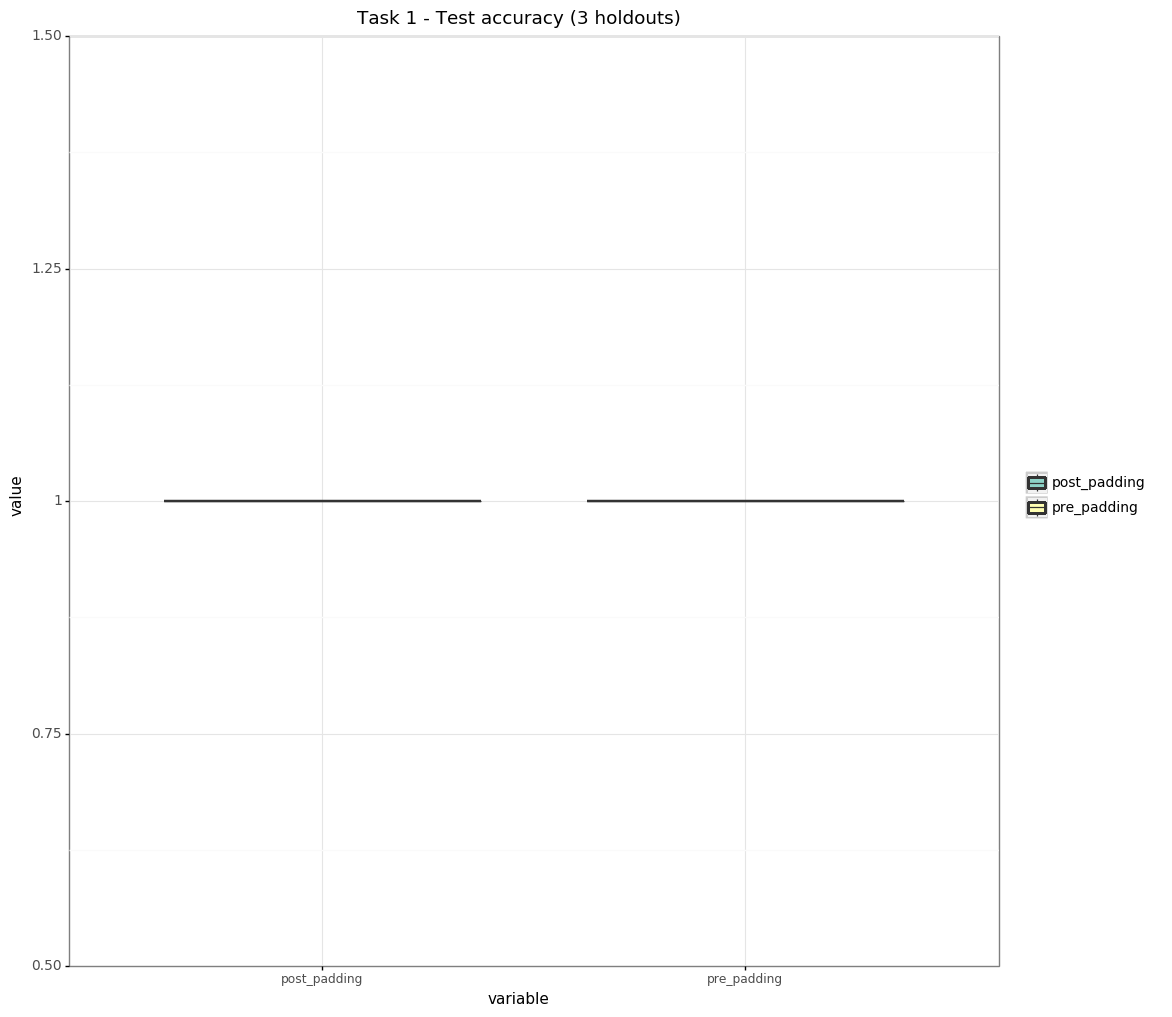

<ggplot: (8775721150377)>

In [95]:
plotting_auc_acc_boxplots(df_accu, folder, 'acc', 3)

In [78]:
scores = confu.apply(lambda x: [y[2] for y in x])

In [79]:
scores['pre_padding'] = scores['post_padding']

In [80]:
scores

,post_padding,pre_padding
0,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor...","{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."
1,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor...","{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."
2,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor...","{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."


In [81]:
list_paddings = ['post_padding', 'pre_padding']

In [82]:
list_dfs = []
for i,row in scores.iterrows():
    for pad in list_paddings:
        prueba = pd.DataFrame(scores.loc[0, pad]).transpose().reset_index()
        prueba.columns = ['class', 'f1-score', 'precision', 'recall', 'support']
        prueba['index'] = row.name
        prueba['type_padding'] = pad
        list_dfs.append(prueba)

In [83]:
pd.concat(list_dfs)

,class,f1-score,precision,recall,support,index,type_padding
0,0,1.0,1.0,1.0,2.0,0,post_padding
1,1,1.0,1.0,1.0,13.0,0,post_padding
2,accuracy,1.0,1.0,1.0,1.0,0,post_padding
3,macro avg,1.0,1.0,1.0,15.0,0,post_padding
4,weighted avg,1.0,1.0,1.0,15.0,0,post_padding
0,0,1.0,1.0,1.0,2.0,0,pre_padding
1,1,1.0,1.0,1.0,13.0,0,pre_padding
2,accuracy,1.0,1.0,1.0,1.0,0,pre_padding
3,macro avg,1.0,1.0,1.0,15.0,0,pre_padding
4,weighted avg,1.0,1.0,1.0,15.0,0,pre_padding


In [64]:
prueba = pd.DataFrame(scores.loc[0, 'post_padding']).transpose().reset_index()
prueba.columns = ['class', 'f1-score', 'precision', 'recall', 'support']

,index,f1-score,precision,recall,support
0,0,1.0,1.0,1.0,2.0
1,1,1.0,1.0,1.0,13.0
2,accuracy,1.0,1.0,1.0,1.0
3,macro avg,1.0,1.0,1.0,15.0
4,weighted avg,1.0,1.0,1.0,15.0


In [58]:
scores = confu.apply(lambda x: [y[2] for y in x])
scores = scores.reset_index(0)
scores
scores = scores.melt(id_vars='index')
scores
#if metrics == "roc":
#    new_col_list = ['fpr','tpr','_']
#    for n,col in enumerate(new_col_list):
#        df[col] = df['value'].apply(lambda value: value[n])
#    df = df.drop('value',axis=1)
#return df

,index,variable,value
0,0,post_padding,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."
1,1,post_padding,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."
2,2,post_padding,"{'1': {'f1-score': 1.0, 'recall': 1.0, 'suppor..."


In [ ]:
def scraper_task1(stringg, model_type):
    precision_0, recall_0, f1_0 = getting_metrics(stringg, model_type, 2,2)
    precision_1, recall_1, f1_1 = getting_metrics(stringg, model_type, 3,2)
    precision_microavg, recall_microavg, f1_microavg = getting_metrics(stringg, model_type, 5,1)
    precision_macroavg, recall_macroavg, f1_macroavg = getting_metrics(stringg, model_type, 6,1)
    precision_weiavg, recall_weiavg, f1_weiavg = getting_metrics(stringg, model_type, 7,1)
    results_df = pd.DataFrame({'precision':[precision_0, precision_1, precision_microavg, precision_macroavg, precision_weiavg],
                 'recall':[recall_0, recall_1, recall_microavg, recall_macroavg, recall_weiavg],
                  'f1_score':[f1_0, f1_1, f1_microavg, f1_macroavg, f1_weiavg],
                  'class':['0', '1', 'micro_avg', 'macro_avg', 'weighted_avg'],
                  'model_type': model_type})
    return results_df


def getting_metrics(cell, n_line, pos):
    linee = cell.split("\n")[n_line]
    list_linee = linee.split("       ")[pos].split("      ")
    precision, recall, f1 = list_linee[0], list_linee[1], list_linee[2]
    return precision, recall, f1

In [ ]:
scores.apply(lambda x: getting_metrics(x,))